In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
######################121-09

In [3]:
lont = lont[:,500:2000]
latt = latt[:,500:2000]
plotvar = plotvar[15,:,500:2000]


In [4]:
lont2 = lont[200:,700]
latt2 = latt[200:,700]
plotvar[plotvar == -1.0] = np.nan

In [5]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.KMT.nc')
        plotvarKMT = data.variables['KMT'][:,:]

In [6]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,:]
        lattu = datau.variables['ULAT'][:,:]

In [7]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.z_w_bot.nc')
        plotvar2 = data.variables['z_w_bot'][:]

In [8]:
depth = plotvar2/100

In [9]:
num = np.arange(1,62)

In [10]:
for i in num: 
    plotvarKMT[plotvarKMT==i] = depth[i]

In [11]:
plotvarKMT[plotvarKMT==0] = -1
lontu[lontu ==-1] = np.nan
lattu[lattu ==-1] = np.nan
lontu[:,1089] = -1

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


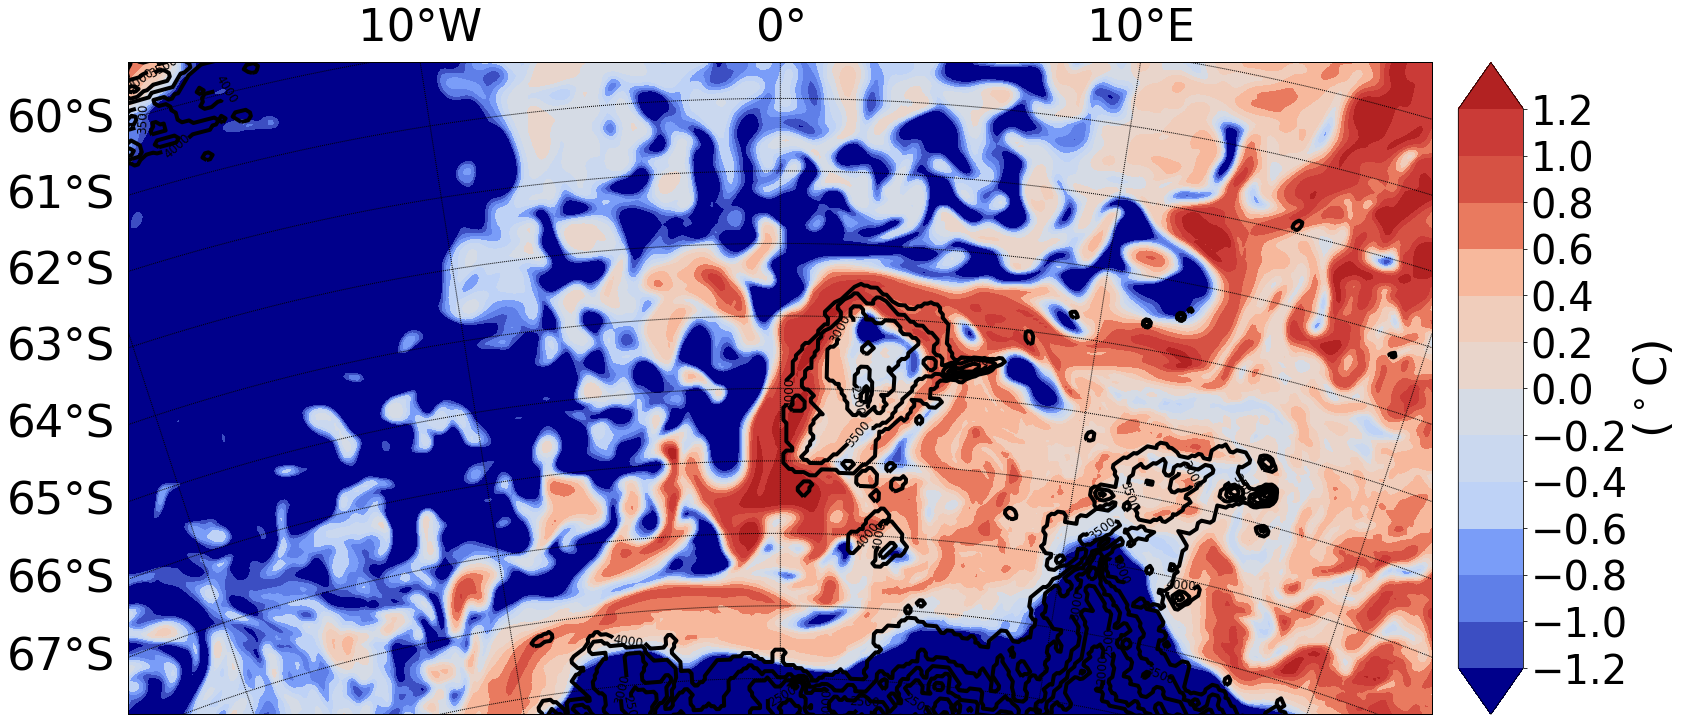

In [12]:
nice_cmap=plt.get_cmap('coolwarm')
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,80,100,110,120,140,150,170,190,210,230,240]) 
#lev_cmap = nice_cmap([1,30,50,70,100,130,140,150,160,170,180,190,210,230,240])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels2 = [2000,2500,3000,3500,4000]
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)
CP = map.contourf(x,y,plotvar,levels = nice_levels,cmap = new_cmap,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

xq,yq=map(lontu,lattu)
  
CS = map.contour(xq,yq,plotvarKMT,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=4)
plt.clabel(CS,fontsize=12,fmt='%4d')
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks= nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=40) 
cbar.set_label('($^\circ$C)', **my_font)
#plt.xlabel("Time 261-09 (Temperature, depth=300m)",**my_font)
plt.savefig("261-09tem.png",bbox_inches='tight')